### Importing the required libraries

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf

In [2]:
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

### Importing the dataset

In [3]:
df = pd.read_csv(r'C:\Users\CHINMAY\Downloads\Data Analysis Challenge Data Set.csv')

### Getting a peek through the dataset

In [4]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [5]:
df.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


By looking at the head and tail of the dataset, we can observe that there are 26 columns in the dataset.

We can also observe that there are some null values in the dataset which are denoted by ?

We will now try to checkout the names of the columns, number of rows, null values in the columns and data-types of each column.

### df.info() gives us some additional information about the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

We observe that even though the dataset have null values, they are not reflected in the above summary. This is because the null values are not in the form of np.nan, they are denoted by ?. The datatypes of even the non-categorical columns are in object (String).

We will have to look into every column having datatype object, so that we get a better understanding of the dataset.

### Let us now see the descriptive characteristics of the non-object columns in the dataset

In [7]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


We can see that none of them have null values, we will cover more about descriptive statistics of the data later in our analysis

### Let us now do univariate analysis of the columns with datatype object

#### Finding unique values in normalized-losses

In [8]:
df['normalized-losses'].unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

It looks like this columns should have a datatype int or float. But it is having dtype object because there is a string (?) value in this column. We will treat it later in our analysis

#### Let's find unique list of manufacturer's in our dataset

In [9]:
df.make.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

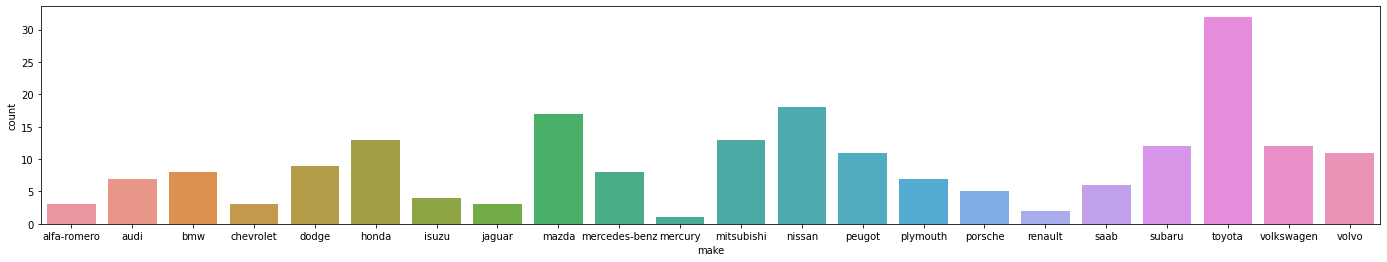

In [10]:
plt.figure(figsize=(24,4))
sns.countplot(x='make', data=df)

The total number of unique brands in our dataset is 22.

The above countplot shows the top 3 brands by volume are Toyota (30), Mazda(15) and Nissan(~15). This makes around 30% of our dataset.

In [11]:
df['fuel-type'].unique()

array(['gas', 'diesel'], dtype=object)

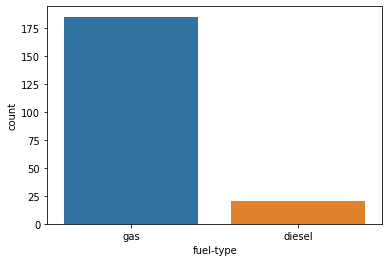

In [12]:
sns.countplot(x='fuel-type', data=df)

Around 90% of the customers in the dataset prefer gas as the fuel-type.

In [13]:
df['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

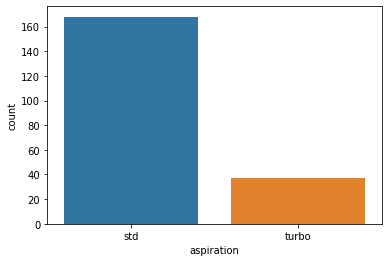

In [14]:
sns.countplot(x='aspiration', data=df)

#### We will now check the preferred number of doors

In [15]:
df['num-of-doors'].unique()

array(['two', 'four', '?'], dtype=object)

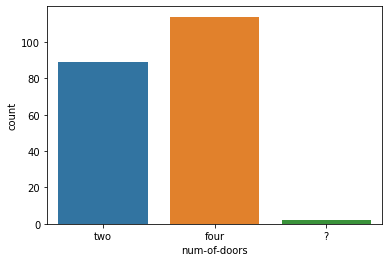

In [16]:
sns.countplot(x='num-of-doors', data=df)

It looks like this categorical columns has some null values. We will treat it later in our analysis

#### Let us now analyse body style to see if there is any pattern

In [17]:
df['body-style'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

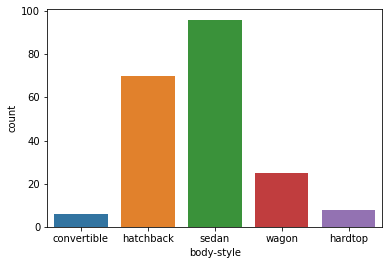

In [18]:
sns.countplot(x='body-style', data=df)

We can observe that hatchback and sedan are the most preferred body styles

#### Analysing drive-wheels

In [19]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

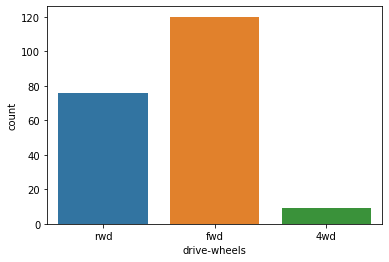

In [20]:
sns.countplot(x='drive-wheels', data=df)

It can be observed that people rarely prefer 4wd. Majority of people in our dataset prefer fwd.

#### Let's see the engine location

In [21]:
df['engine-location'].unique()

array(['front', 'rear'], dtype=object)

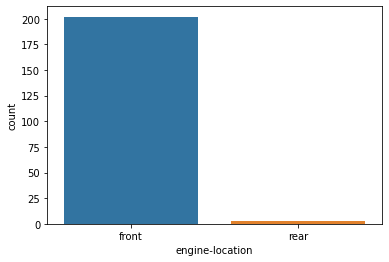

In [22]:
sns.countplot(x='engine-location', data=df)

More than 99% of the cars in our dataset have their engine in front.

#### Let us now visualize the engine type

In [23]:
df['engine-type'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

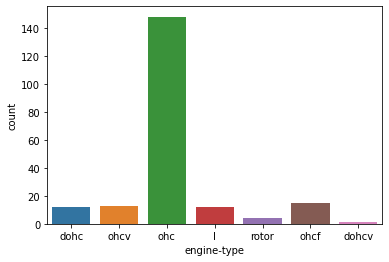

In [24]:
sns.countplot(x='engine-type', data=df)

Looks like ohc is the most dominant engine type

#### Number of cylinders

In [25]:
df['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

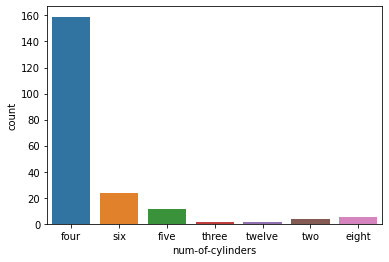

In [26]:
sns.countplot(x='num-of-cylinders', data=df)

People generally prefer a four cylinder engine. We will try to look for the cars not having four cylinder engine.

In [27]:
df[df['num-of-cylinders'] != 'four']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?
12,0,188,bmw,gas,std,two,sedan,rwd,front,101.2,...,164,mpfi,3.31,3.19,9.0,121,4250,21,28,20970
13,0,188,bmw,gas,std,four,sedan,rwd,front,101.2,...,164,mpfi,3.31,3.19,9.0,121,4250,21,28,21105
14,1,?,bmw,gas,std,four,sedan,rwd,front,103.5,...,164,mpfi,3.31,3.19,9.0,121,4250,20,25,24565


#### Fuel-System

In [28]:
df['fuel-system'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

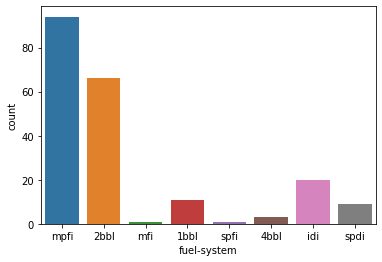

In [29]:
sns.countplot(x='fuel-system', data=df)

#### We will now see the suspect object types that have numerical values. We will try to find why is it so

In [30]:
df['bore'].unique()

array(['3.47', '2.68', '3.19', '3.13', '3.5', '3.31', '3.62', '2.91',
       '3.03', '2.97', '3.34', '3.6', '2.92', '3.15', '3.43', '3.63',
       '3.54', '3.08', '?', '3.39', '3.76', '3.58', '3.46', '3.8', '3.78',
       '3.17', '3.35', '3.59', '2.99', '3.33', '3.7', '3.61', '3.94',
       '3.74', '2.54', '3.05', '3.27', '3.24', '3.01'], dtype=object)

In [31]:
df['stroke'].unique()

array(['2.68', '3.47', '3.4', '2.8', '3.19', '3.39', '3.03', '3.11',
       '3.23', '3.46', '3.9', '3.41', '3.07', '3.58', '4.17', '2.76',
       '3.15', '?', '3.16', '3.64', '3.1', '3.35', '3.12', '3.86', '3.29',
       '3.27', '3.52', '2.19', '3.21', '2.9', '2.07', '2.36', '2.64',
       '3.08', '3.5', '3.54', '2.87'], dtype=object)

In [32]:
df['horsepower'].unique()

array(['111', '154', '102', '115', '110', '140', '160', '101', '121',
       '182', '48', '70', '68', '88', '145', '58', '76', '60', '86',
       '100', '78', '90', '176', '262', '135', '84', '64', '120', '72',
       '123', '155', '184', '175', '116', '69', '55', '97', '152', '200',
       '95', '142', '143', '207', '288', '?', '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

In [33]:
df['peak-rpm'].unique()

array(['5000', '5500', '5800', '4250', '5400', '5100', '4800', '6000',
       '4750', '4650', '4200', '4350', '4500', '5200', '4150', '5600',
       '5900', '5750', '?', '5250', '4900', '4400', '6600', '5300'],
      dtype=object)

In [34]:
df['price'].unique()

array(['13495', '16500', '13950', '17450', '15250', '17710', '18920',
       '23875', '?', '16430', '16925', '20970', '21105', '24565', '30760',
       '41315', '36880', '5151', '6295', '6575', '5572', '6377', '7957',
       '6229', '6692', '7609', '8558', '8921', '12964', '6479', '6855',
       '5399', '6529', '7129', '7295', '7895', '9095', '8845', '10295',
       '12945', '10345', '6785', '11048', '32250', '35550', '36000',
       '5195', '6095', '6795', '6695', '7395', '10945', '11845', '13645',
       '15645', '8495', '10595', '10245', '10795', '11245', '18280',
       '18344', '25552', '28248', '28176', '31600', '34184', '35056',
       '40960', '45400', '16503', '5389', '6189', '6669', '7689', '9959',
       '8499', '12629', '14869', '14489', '6989', '8189', '9279', '5499',
       '7099', '6649', '6849', '7349', '7299', '7799', '7499', '7999',
       '8249', '8949', '9549', '13499', '14399', '17199', '19699',
       '18399', '11900', '13200', '12440', '13860', '15580', '16900',


We can see that all the above columns have null values ?, we will have to replace these cells with np.nan to treat them for further analysis.

#### Replacing all the ? cells with np.nan.

In [35]:
df=df.replace('?', np.nan)

#### Lets now check how many null values are there in out dataset

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [37]:
df.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

We can see that the column normalized-losses has 31 null values. Apart from this columns num-of-doors, bore, stroke, horsepower and price have some null values. We will have to treat these null values so that we can go ahead with further analysis.

But first, we will have to convert all the numerical column types to object float.

In [38]:
df['normalized-losses'] = df['normalized-losses'].astype(float)
df['bore'] = df['bore'].astype(float)
df['stroke'] = df['stroke'].astype(float)
df['horsepower'] = df['horsepower'].astype(float)
df['peak-rpm'] = df['peak-rpm'].astype(float)
df['price'] = df['price'].astype(float)

#### Let us now check the data types of each of the columns

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

We now have the correct datatypes for all the columns in our dataset. Let us now treat the null values

In [40]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


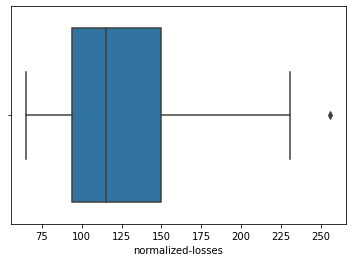

In [41]:
sns.boxplot(x='normalized-losses', data=df)

In [42]:
df['normalized-losses'].iplot(kind='box')

In [43]:
df['normalized-losses'] = df['normalized-losses'].fillna(df['normalized-losses'].mean())

From the above box plots we can see that normalized-losses do not have many outliers. So we have decided to replace the null values with the mean of the column.

In [44]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,31.681008,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,137.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [45]:
df['bore'] = df['bore'].fillna(df['bore'].mean())
df['stroke'] = df['stroke'].fillna(df['stroke'].mean())
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())

In [46]:
df['price'] = df['price'].fillna(df['price'].median())

Similarly, we have decided to treat the null values for bore, stroke and horsepower with mean. Since price column has outliers, we have decided to replace its null values with median.

In [47]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,203.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13150.307317
std,1.245307,31.681008,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.519211,479.334560,6.542142,6.886443,7879.121326
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,137.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


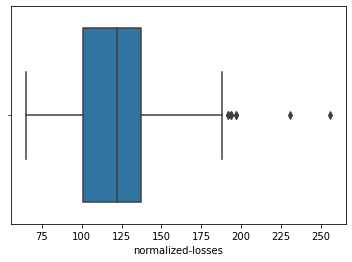

In [48]:
sns.boxplot(x='normalized-losses', data=df)

After treating the null values,we can see that normalized-losses have outliers above 185. Lets check them

In [49]:
df[df['normalized-losses']>=185]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
10,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101.0,5800.0,23,29,16430.0
11,0,192.0,bmw,gas,std,four,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101.0,5800.0,23,29,16925.0
12,0,188.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,164,mpfi,3.31,3.19,9.0,121.0,4250.0,21,28,20970.0
13,0,188.0,bmw,gas,std,four,sedan,rwd,front,101.2,...,164,mpfi,3.31,3.19,9.0,121.0,4250.0,21,28,21105.0
104,3,194.0,nissan,gas,std,two,hatchback,rwd,front,91.3,...,181,mpfi,3.43,3.27,9.0,160.0,5200.0,19,25,17199.0
105,3,194.0,nissan,gas,turbo,two,hatchback,rwd,front,91.3,...,181,mpfi,3.43,3.27,7.8,200.0,5200.0,17,23,19699.0
106,1,231.0,nissan,gas,std,two,hatchback,rwd,front,99.2,...,181,mpfi,3.43,3.27,9.0,160.0,5200.0,19,25,18399.0
125,3,186.0,porsche,gas,std,two,hatchback,rwd,front,94.5,...,151,mpfi,3.94,3.11,9.5,143.0,5500.0,19,27,22018.0
178,3,197.0,toyota,gas,std,two,hatchback,rwd,front,102.9,...,171,mpfi,3.27,3.35,9.3,161.0,5200.0,20,24,16558.0
179,3,197.0,toyota,gas,std,two,hatchback,rwd,front,102.9,...,171,mpfi,3.27,3.35,9.3,161.0,5200.0,19,24,15998.0


We can see that all the cars having normalized losses greater than 185 has body style as sedan or hatchback. All of them has fuel-type gas and engine-location in front. Moreover a broad range of the cars lie between 10000 and 20000.

Plotting a boxplot for wheelbase

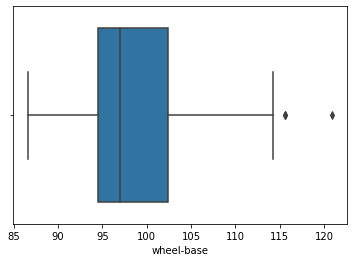

In [50]:
sns.boxplot(x='wheel-base', data=df)

Checking for outliers

In [51]:
df[df['wheel-base']>115]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
70,-1,93.0,mercedes-benz,diesel,turbo,four,sedan,rwd,front,115.6,...,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,31600.0
71,-1,122.0,mercedes-benz,gas,std,four,sedan,rwd,front,115.6,...,234,mpfi,3.46,3.10,8.3,155.0,4750.0,16,18,34184.0
73,0,122.0,mercedes-benz,gas,std,four,sedan,rwd,front,120.9,...,308,mpfi,3.80,3.35,8.0,184.0,4500.0,14,16,40960.0


Looks like the above 3 mercedes-benz models have a larger wheelbase compared to others

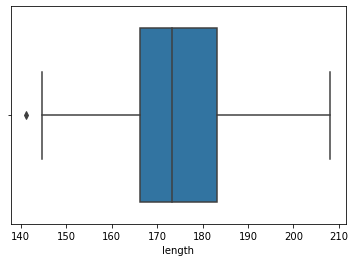

In [52]:
sns.boxplot(x='length', data=df)

There are no significant outliers in lenght column. No need to treat it.

Lets see width

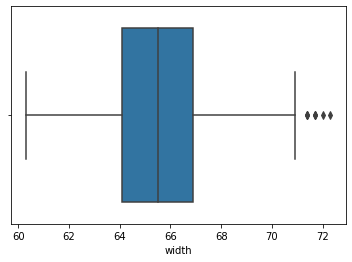

In [53]:
sns.boxplot(x='width', data=df)

Looks like there are outliers for width > 71

In [54]:
df[df['width']>71]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
7,1,122.0,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
70,-1,93.0,mercedes-benz,diesel,turbo,four,sedan,rwd,front,115.6,...,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,31600.0
71,-1,122.0,mercedes-benz,gas,std,four,sedan,rwd,front,115.6,...,234,mpfi,3.46,3.10,8.3,155.0,4750.0,16,18,34184.0
73,0,122.0,mercedes-benz,gas,std,four,sedan,rwd,front,120.9,...,308,mpfi,3.80,3.35,8.0,184.0,4500.0,14,16,40960.0
74,1,122.0,mercedes-benz,gas,std,two,hardtop,rwd,front,112.0,...,304,mpfi,3.80,3.35,8.0,184.0,4500.0,14,16,45400.0
129,1,122.0,porsche,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288.0,5750.0,17,28,10295.0


Some high end models of Mercedes-benz and Audi fall in this category. Porsche in row number 129, looks like an exception because of its price.

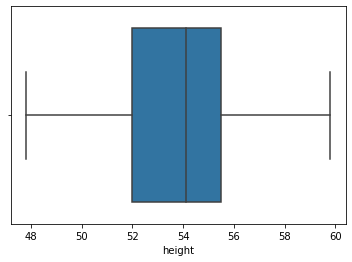

In [55]:
sns.boxplot(x='height', data=df)

Height has no outliers.

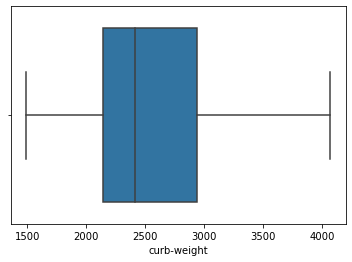

In [56]:
sns.boxplot(x='curb-weight', data=df)

Curb Weight has no outliers

Lets plot a box plot for engine-size

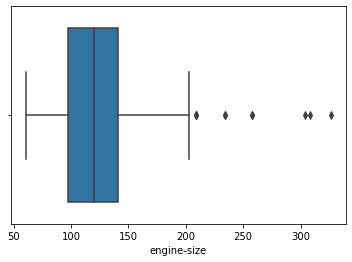

In [57]:
sns.boxplot(x='engine-size', data=df)

Looks like there are significant outliers above engine-size 200

In [58]:
df[df['engine-size']>200]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
15,0,122.0,bmw,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,30760.0
16,0,122.0,bmw,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,41315.0
17,0,122.0,bmw,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,15,20,36880.0
47,0,145.0,jaguar,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176.0,4750.0,15,19,32250.0
48,0,122.0,jaguar,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176.0,4750.0,15,19,35550.0
49,0,122.0,jaguar,gas,std,two,sedan,rwd,front,102.0,...,326,mpfi,3.54,2.76,11.5,262.0,5000.0,13,17,36000.0
71,-1,122.0,mercedes-benz,gas,std,four,sedan,rwd,front,115.6,...,234,mpfi,3.46,3.10,8.3,155.0,4750.0,16,18,34184.0
72,3,142.0,mercedes-benz,gas,std,two,convertible,rwd,front,96.6,...,234,mpfi,3.46,3.10,8.3,155.0,4750.0,16,18,35056.0
73,0,122.0,mercedes-benz,gas,std,four,sedan,rwd,front,120.9,...,308,mpfi,3.80,3.35,8.0,184.0,4500.0,14,16,40960.0
74,1,122.0,mercedes-benz,gas,std,two,hardtop,rwd,front,112.0,...,304,mpfi,3.80,3.35,8.0,184.0,4500.0,14,16,45400.0


These outliers looks like high-end cars with price greater than 30000 USD. The make of these cars are BMW, Jaguar, MB and Porsche. We can see an anamoly in Porsche. It's price is only 10295. 

Compression Ratio

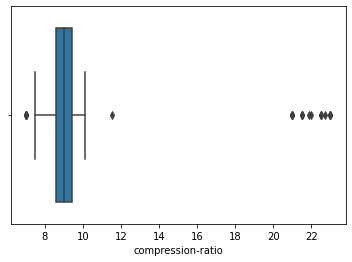

In [59]:
sns.boxplot(x='compression-ratio', data=df)

Most of the cars fall in the range of 7 to 11. Lets observe the entries which have CR > 11

In [60]:
df[df['compression-ratio']>11]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
49,0,122.0,jaguar,gas,std,two,sedan,rwd,front,102.0,...,326,mpfi,3.54,2.76,11.5,262.0,5000.0,13,17,36000.0
63,0,122.0,mazda,diesel,std,NaN,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0
66,0,122.0,mazda,diesel,std,four,sedan,rwd,front,104.9,...,134,idi,3.43,3.64,22.0,72.0,4200.0,31,39,18344.0
67,-1,93.0,mercedes-benz,diesel,turbo,four,sedan,rwd,front,110.0,...,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,25552.0
68,-1,93.0,mercedes-benz,diesel,turbo,four,wagon,rwd,front,110.0,...,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,28248.0
69,0,93.0,mercedes-benz,diesel,turbo,two,hardtop,rwd,front,106.7,...,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,28176.0
70,-1,93.0,mercedes-benz,diesel,turbo,four,sedan,rwd,front,115.6,...,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,31600.0
90,1,128.0,nissan,diesel,std,two,sedan,fwd,front,94.5,...,103,idi,2.99,3.47,21.9,55.0,4800.0,45,50,7099.0
108,0,161.0,peugot,diesel,turbo,four,sedan,rwd,front,107.9,...,152,idi,3.70,3.52,21.0,95.0,4150.0,28,33,13200.0
110,0,122.0,peugot,diesel,turbo,four,wagon,rwd,front,114.2,...,152,idi,3.70,3.52,21.0,95.0,4150.0,25,25,13860.0


There are around 21 entries. Which is a lot. We can try to find the correlation between CR and Price in the later section.

Horsepower

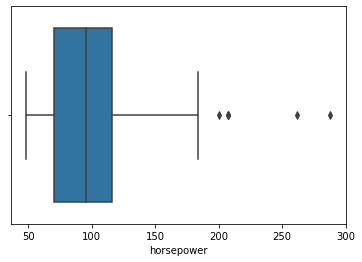

In [61]:
sns.boxplot(x='horsepower', data=df)

The range for horsepower lies between 50 to 180, with outliers as horsepower >= 200

In [62]:
df[df['horsepower']>=200]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
49,0,122.0,jaguar,gas,std,two,sedan,rwd,front,102.0,...,326,mpfi,3.54,2.76,11.5,262.0,5000.0,13,17,36000.0
105,3,194.0,nissan,gas,turbo,two,hatchback,rwd,front,91.3,...,181,mpfi,3.43,3.27,7.8,200.0,5200.0,17,23,19699.0
126,3,122.0,porsche,gas,std,two,hardtop,rwd,rear,89.5,...,194,mpfi,3.74,2.90,9.5,207.0,5900.0,17,25,32528.0
127,3,122.0,porsche,gas,std,two,hardtop,rwd,rear,89.5,...,194,mpfi,3.74,2.90,9.5,207.0,5900.0,17,25,34028.0
128,3,122.0,porsche,gas,std,two,convertible,rwd,rear,89.5,...,194,mpfi,3.74,2.90,9.5,207.0,5900.0,17,25,37028.0
129,1,122.0,porsche,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288.0,5750.0,17,28,10295.0


Again, the price of Porsche at row number 129 looks like an anamoly. Also, Nissan at row 105 has an impressive horsepower with price much lower than its peers.

Peak RPM

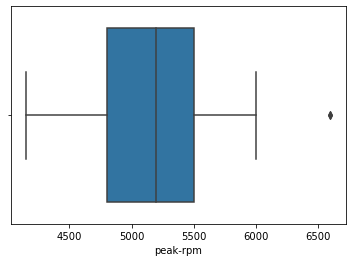

In [63]:
sns.boxplot(x='peak-rpm', data=df)

In [64]:
df[df['peak-rpm']>=6500]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
165,1,168.0,toyota,gas,std,two,sedan,rwd,front,94.5,...,98,mpfi,3.24,3.08,9.4,112.0,6600.0,26,29,9298.0
166,1,168.0,toyota,gas,std,two,hatchback,rwd,front,94.5,...,98,mpfi,3.24,3.08,9.4,112.0,6600.0,26,29,9538.0


Toyota looks like an outlier, with both the cars having rpm of 6600.

City-MPG

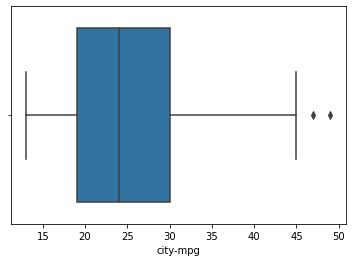

In [65]:
sns.boxplot(x='city-mpg', data=df)

Most cars give city milage in the range of 12 to 45. Lets check for outliers

In [66]:
df[df['city-mpg']>=46]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
18,2,121.0,chevrolet,gas,std,two,hatchback,fwd,front,88.4,...,61,2bbl,2.91,3.03,9.5,48.0,5100.0,47,53,5151.0
30,2,137.0,honda,gas,std,two,hatchback,fwd,front,86.6,...,92,1bbl,2.91,3.41,9.6,58.0,4800.0,49,54,6479.0


The above two cars have a high city milage. So, if one is looking for a hatchback with high milage in a afforbable price range, they can go for it.

Highway MPG

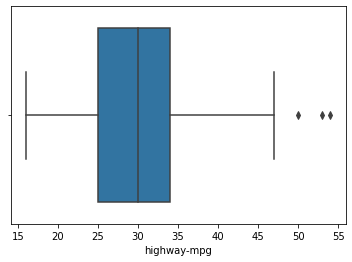

In [67]:
sns.boxplot(x='highway-mpg', data=df)

Highway Milage is in the range 16 to 47, with >= 50 as outliers.

In [68]:
df[df['highway-mpg']>=50]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
18,2,121.0,chevrolet,gas,std,two,hatchback,fwd,front,88.4,...,61,2bbl,2.91,3.03,9.5,48.0,5100.0,47,53,5151.0
30,2,137.0,honda,gas,std,two,hatchback,fwd,front,86.6,...,92,1bbl,2.91,3.41,9.6,58.0,4800.0,49,54,6479.0
90,1,128.0,nissan,diesel,std,two,sedan,fwd,front,94.5,...,103,idi,2.99,3.47,21.9,55.0,4800.0,45,50,7099.0


These are the same cars as above,with nissan being an addition.

Price

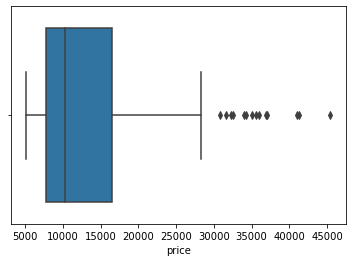

In [69]:
sns.boxplot(x='price', data=df)

Lets check for cars with price > 30000

In [70]:
df[df['price']>=30000]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
15,0,122.0,bmw,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,30760.0
16,0,122.0,bmw,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,41315.0
17,0,122.0,bmw,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,15,20,36880.0
47,0,145.0,jaguar,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176.0,4750.0,15,19,32250.0
48,0,122.0,jaguar,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176.0,4750.0,15,19,35550.0
49,0,122.0,jaguar,gas,std,two,sedan,rwd,front,102.0,...,326,mpfi,3.54,2.76,11.5,262.0,5000.0,13,17,36000.0
70,-1,93.0,mercedes-benz,diesel,turbo,four,sedan,rwd,front,115.6,...,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,31600.0
71,-1,122.0,mercedes-benz,gas,std,four,sedan,rwd,front,115.6,...,234,mpfi,3.46,3.10,8.3,155.0,4750.0,16,18,34184.0
72,3,142.0,mercedes-benz,gas,std,two,convertible,rwd,front,96.6,...,234,mpfi,3.46,3.10,8.3,155.0,4750.0,16,18,35056.0
73,0,122.0,mercedes-benz,gas,std,four,sedan,rwd,front,120.9,...,308,mpfi,3.80,3.35,8.0,184.0,4500.0,14,16,40960.0


These are high end cars which are either sedan, hardtop or convertible.

#### We are done with univariate analysis, now let us try to check the correlation of our features with price.

#### But before that we will have to do the encoding of categorical variables. Let us do that

#### Encoding to be done for

1. Make - Let us not consider it for predictive analysis, since, it will additionally create lots of columns and may not help improve our prediction.
2. Fuel Type - We will do a dummy variable encoding for this column.
3. Aspiration - We will do a dummy variable encoding for this column.
4. No. of doors - We will do a dummy variable encoding for this column.
5. Body Style - We will do a dummy variable encoding for this column.
6. Drive Wheels - We will do a dummy variable encoding for this column. 
7. Engine Location - We will do a dummy variable encoding for this column.
8. Fuel System - We will do a dummy variable encoding for this column.
9. Engine Type - We will do a dummy variable encoding for this column.
10. Number of Cylinders - We will do a dummy variable encoding for this column.


Lets prepare the data for encoding

In [71]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


#### Dropping make column for further analysis

In [72]:
df = df.drop(columns=['make'], axis=1)

Treating nan values with most frequent values in num-of-doors column

In [73]:
df['num-of-doors'].unique()

array(['two', 'four', nan], dtype=object)

In [74]:
df['num-of-doors']=df['num-of-doors'].replace({np.nan:'four'})

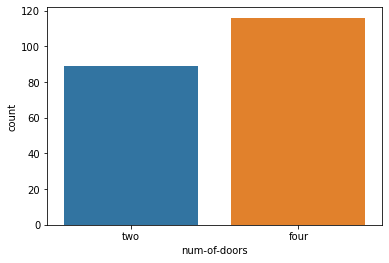

In [75]:
sns.countplot(x='num-of-doors', data=df)

Lets check the first five rows

In [76]:
df.head()

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


#### Lets convert the categorical columns into dummies

In [77]:
df=pd.get_dummies(df)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 54 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   symboling                205 non-null    int64  
 1   normalized-losses        205 non-null    float64
 2   wheel-base               205 non-null    float64
 3   length                   205 non-null    float64
 4   width                    205 non-null    float64
 5   height                   205 non-null    float64
 6   curb-weight              205 non-null    int64  
 7   engine-size              205 non-null    int64  
 8   bore                     205 non-null    float64
 9   stroke                   205 non-null    float64
 10  compression-ratio        205 non-null    float64
 11  horsepower               205 non-null    float64
 12  peak-rpm                 203 non-null    float64
 13  city-mpg                 205 non-null    int64  
 14  highway-mpg              2

We now have 54 columns, Lets remove one category from each of the categorical variable to avoid dummy variable trap.

In [79]:
df=df.drop(columns=['fuel-system_spfi','num-of-cylinders_two','engine-type_rotor','engine-location_rear','drive-wheels_rwd','body-style_wagon','num-of-doors_two','aspiration_turbo','fuel-type_diesel'])

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   symboling                205 non-null    int64  
 1   normalized-losses        205 non-null    float64
 2   wheel-base               205 non-null    float64
 3   length                   205 non-null    float64
 4   width                    205 non-null    float64
 5   height                   205 non-null    float64
 6   curb-weight              205 non-null    int64  
 7   engine-size              205 non-null    int64  
 8   bore                     205 non-null    float64
 9   stroke                   205 non-null    float64
 10  compression-ratio        205 non-null    float64
 11  horsepower               205 non-null    float64
 12  peak-rpm                 203 non-null    float64
 13  city-mpg                 205 non-null    int64  
 14  highway-mpg              2

Let's see how the data is distributed

C:\Users\CHINMAY\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\CHINMAY\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\CHINMAY\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\CHINMAY\Anaconda3\lib\

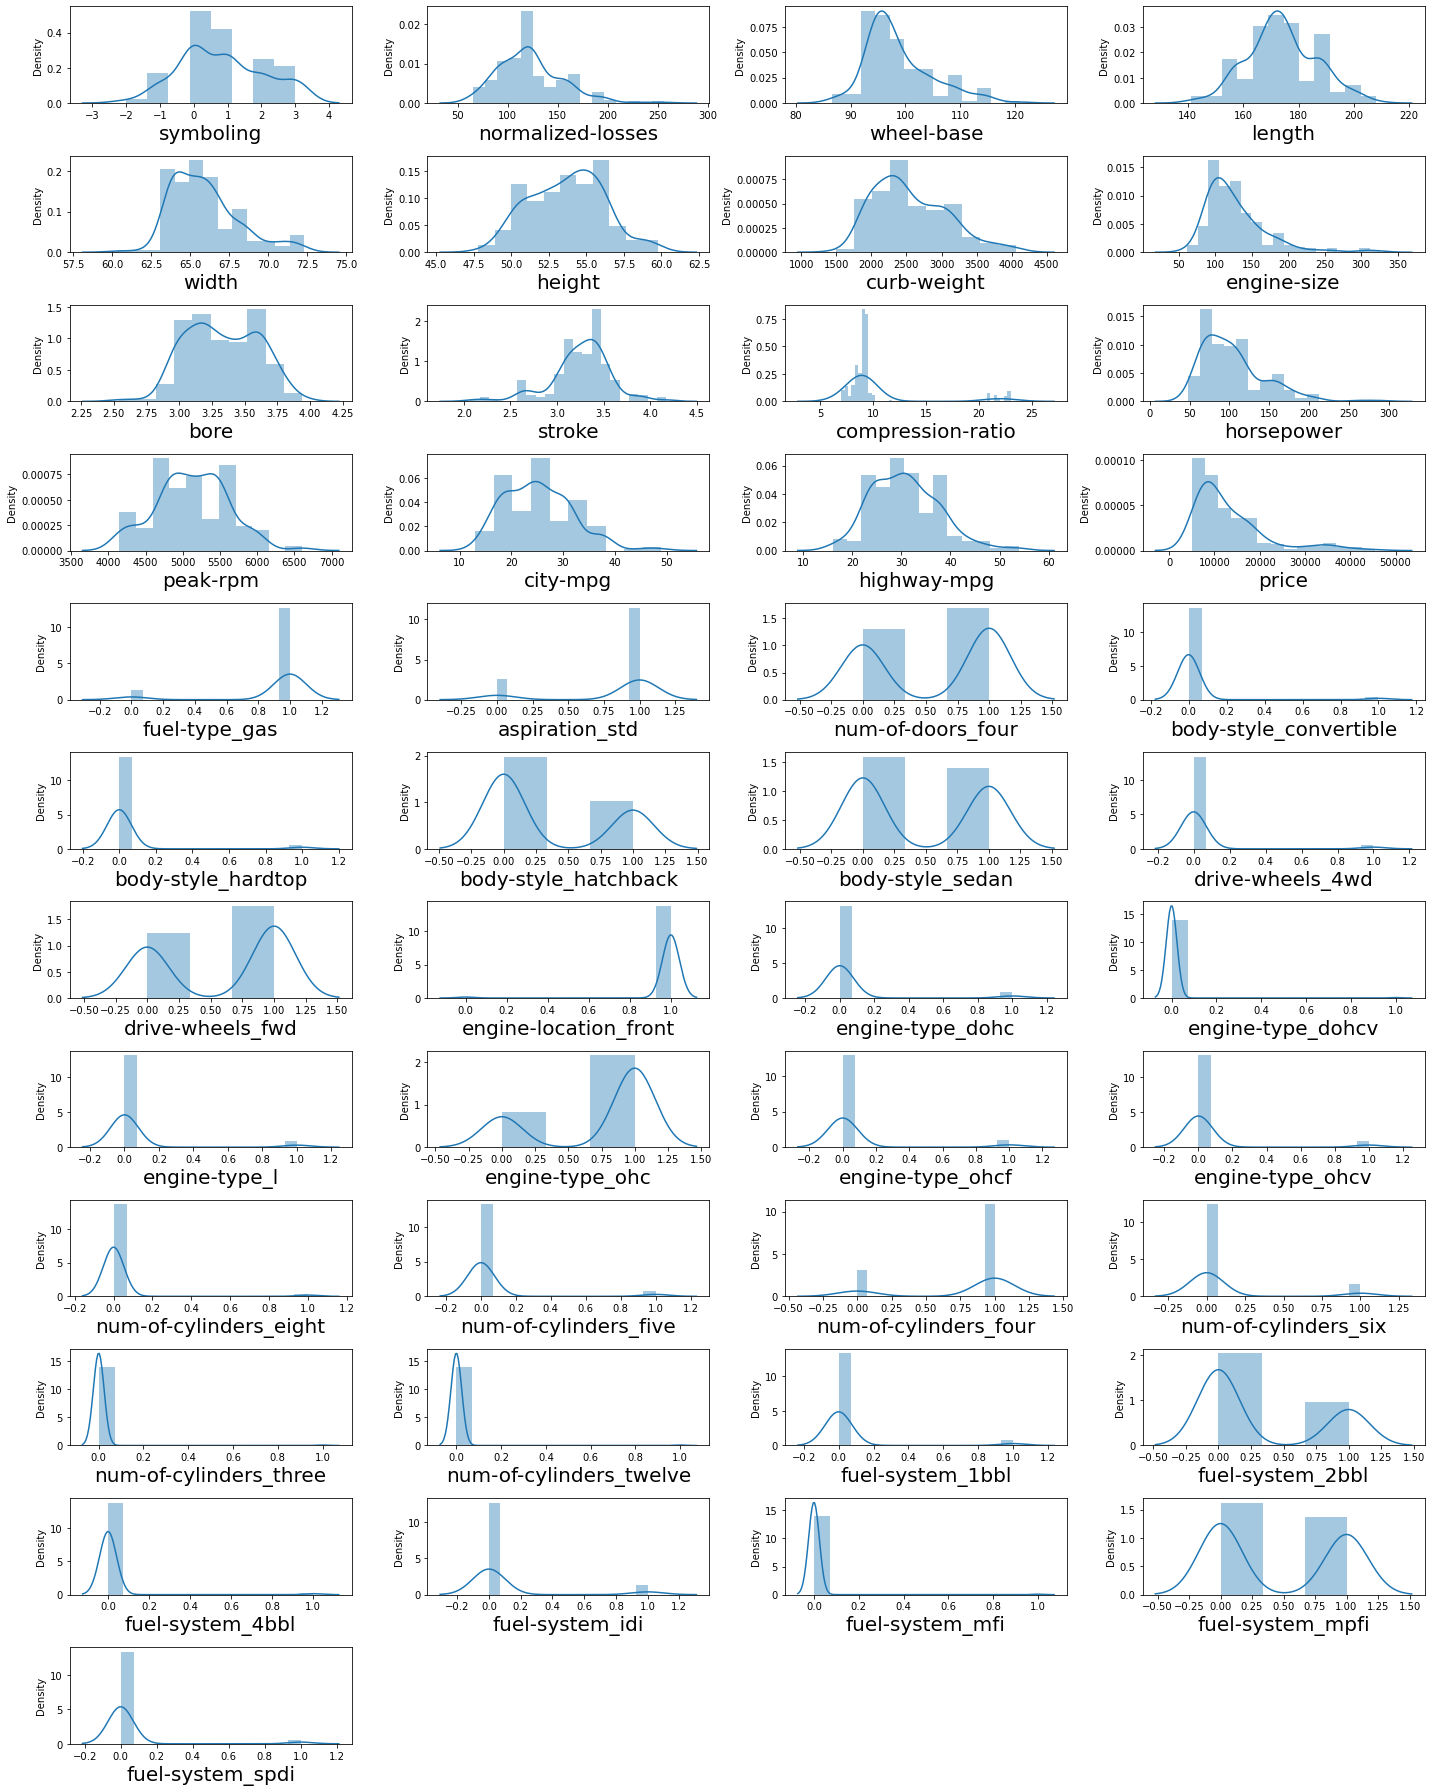

In [81]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=48 :
        ax = plt.subplot(12,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

From the above plots, we can see that most of the numerical data has been normally distributed. Hence we need not to treat this data as of now.

In [82]:
y = df['price']
X =df.drop(columns = ['price'])

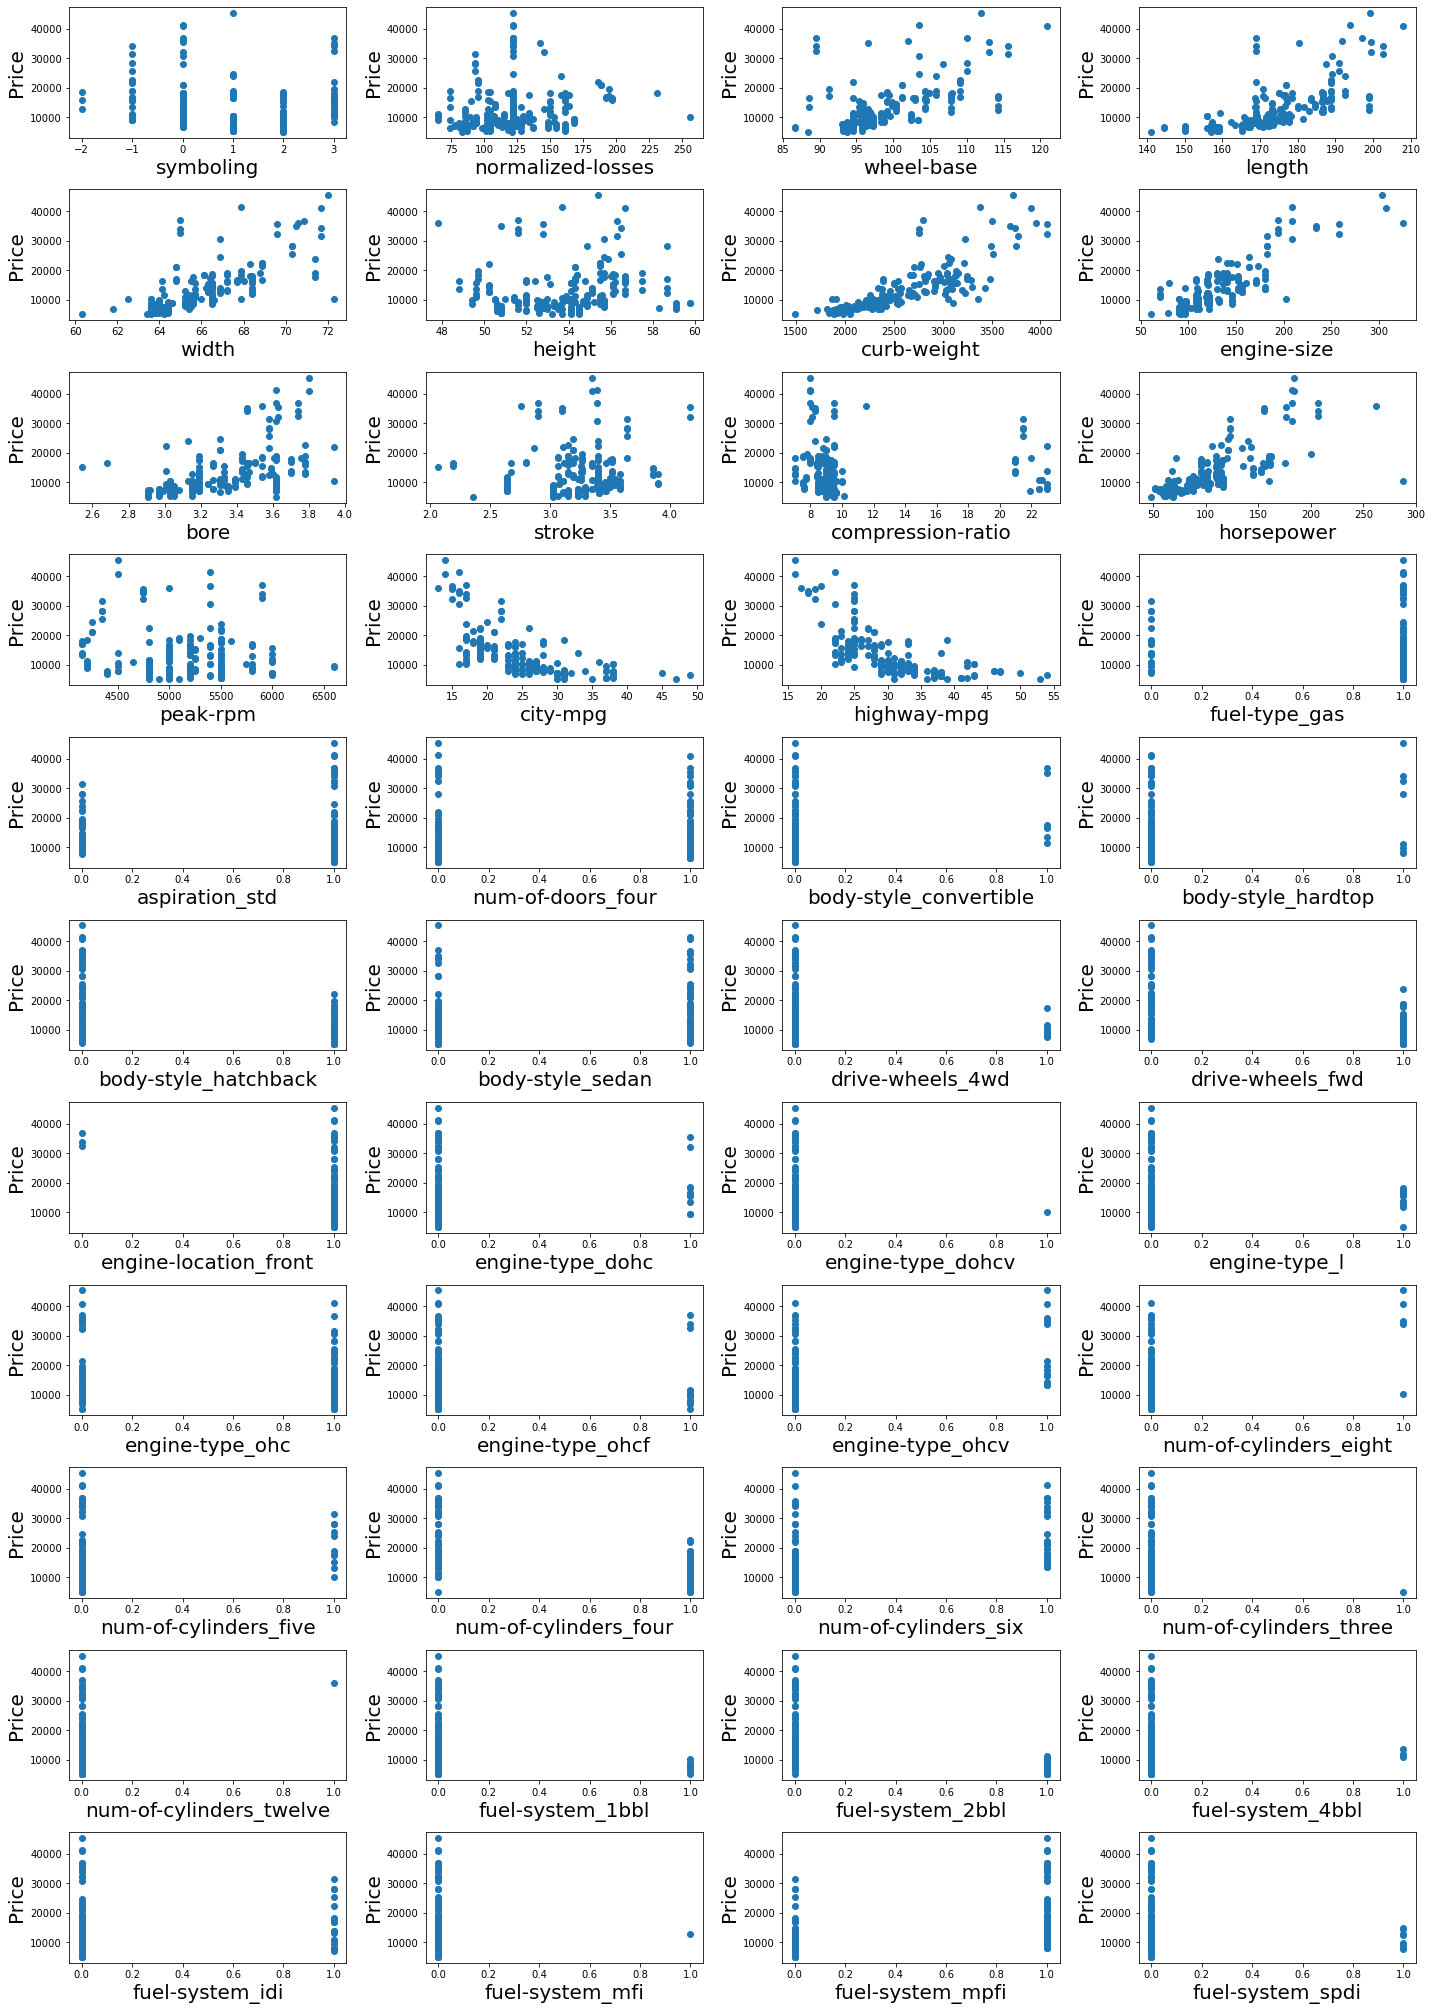

In [83]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=45 :
        ax = plt.subplot(12,4,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Price',fontsize=20)
    plotnumber+=1
plt.tight_layout()

#### From the above plots, we can observe a some important patterns. Eg.

1. Length, width, curb-weight, engine-size and horsepower of the car increases with price.
2. City MPG and Highway MPG of car decreases with price.
3. Very few cars have compression ratio > 12.
4. Some other patterns were explained while doing univariate analysis.

#### We will now check variable inflation factor for the variables to see if there is high correlation between any of the variables.

We will have to scale our data first

In [84]:
# Looks like we have nan values in peak-rpm
X['peak-rpm'] = X['peak-rpm'].fillna(X['peak-rpm'].mean())

In [85]:
X.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi
0,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,0,1,0
1,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,0,1,0
2,1,122.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,1,0,0,0,0,0,0,0,1,0
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,0,0,1,0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,0,0,1,0


In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(X)

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = scaled

C:\Users\CHINMAY\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [88]:
vif = pd.DataFrame()

In [89]:
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]

C:\Users\CHINMAY\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning:

divide by zero encountered in double_scalars



In [90]:
vif=vif.rename(index={0:'symboling',1:'normalized-losses',2:'wheel-base',3:'length',4:'width',5:'height',6:'curb-weight',7:'engine-size',8:'bore',9:'stroke',10:'compression-ratio',11:'horsepower',12:'peak-rpm',13:'city-mpg',14:'highway-mpg',15:'fuel-type_gas',16:'aspiration-std',17:'num-of-doors_four',18:'body-style_convertible',19:'body-style_hardtop',20:'body-style_hatchback',21:'body-style_sedan',22:'drive-wheels_4wd',23:'drive-wheels_fwd',24:'engine-location_front',25:'engine-location_dohc',26:'engine-location_dohcv',27:'engine-location_l',28:'engine-location_ohc',29:'engine-location_ohcf',30:'engine-location_ohcv',31:'num-of-cylinders_eight',32:'num-of-cylinders_five',33:'num-of-cylinders_four',34:'num-of-cylinders_six',35:'num-of-cylinders_three',36:'num-of-cylinders_twelve',37:'fuel-system_1bbl',38:'fuel-system_2bbl',39:'fuel-system_4bbl',40:'fuel-system_idi',41:'fuel-system_mfi',42:'fuel-system_mpfi',43:'fuel-system_spdi'})
vif

,VIF
symboling,4.262123
normalized-losses,2.601603
wheel-base,14.665020
length,15.482666
width,11.218447
height,4.396799
curb-weight,33.779065
engine-size,50.027042
bore,7.925308
stroke,3.357822


We have very high VIF for some of the columns, Let us keep the vif threshold as 15 and remove the columns that are insignificant for our analysis

In [91]:
X=X.drop(columns=['length','curb-weight','engine-size','compression-ratio','horsepower','city-mpg','highway-mpg','engine-type_dohc','engine-type_dohcv','engine-type_l','engine-type_ohc','engine-type_ohcf','engine-type_ohcv','num-of-cylinders_eight','num-of-cylinders_five','num-of-cylinders_four','num-of-cylinders_six','num-of-cylinders_three','num-of-cylinders_twelve','fuel-system_2bbl','fuel-system_mpfi'])

In [92]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    float64
 2   wheel-base              205 non-null    float64
 3   width                   205 non-null    float64
 4   height                  205 non-null    float64
 5   bore                    205 non-null    float64
 6   stroke                  205 non-null    float64
 7   peak-rpm                205 non-null    float64
 8   fuel-type_gas           205 non-null    uint8  
 9   aspiration_std          205 non-null    uint8  
 10  num-of-doors_four       205 non-null    uint8  
 11  body-style_convertible  205 non-null    uint8  
 12  body-style_hardtop      205 non-null    uint8  
 13  body-style_hatchback    205 non-null    uint8  
 14  body-style_sedan        205 non-null    ui

We now have 23 columns left for our analysis

In [93]:
X.head()

,symboling,normalized-losses,wheel-base,width,height,bore,stroke,peak-rpm,fuel-type_gas,aspiration_std,...,body-style_hatchback,body-style_sedan,drive-wheels_4wd,drive-wheels_fwd,engine-location_front,fuel-system_1bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_spdi
0,3,122.0,88.6,64.1,48.8,3.47,2.68,5000.0,1,1,...,0,0,0,0,1,0,0,0,0,0
1,3,122.0,88.6,64.1,48.8,3.47,2.68,5000.0,1,1,...,0,0,0,0,1,0,0,0,0,0
2,1,122.0,94.5,65.5,52.4,2.68,3.47,5000.0,1,1,...,1,0,0,0,1,0,0,0,0,0
3,2,164.0,99.8,66.2,54.3,3.19,3.40,5500.0,1,1,...,0,1,0,1,1,0,0,0,0,0
4,2,164.0,99.4,66.4,54.3,3.19,3.40,5500.0,1,1,...,0,1,1,0,1,0,0,0,0,0


Let us also check the correlation between each of the independent variables.

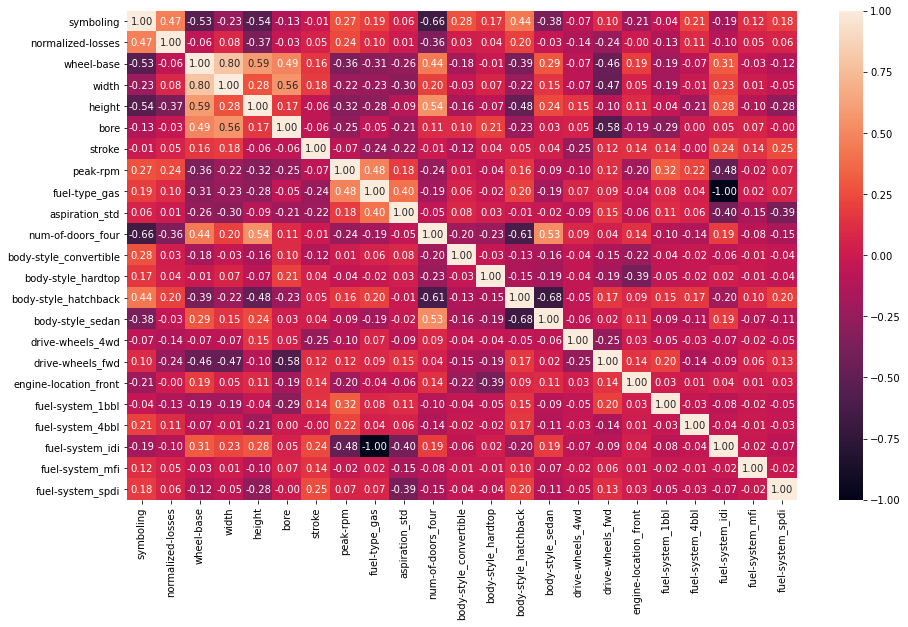

In [94]:
corr=X.corr()
plt.figure(figsize=(15,9))
a = sns.heatmap(corr, annot=True, fmt='.2f')

Considering correlation greater than .75 as high correlation, we have high correlation between fuel_system_idi and fuel_type_gas.

We have decided to drop the column fuel_system_idi from our further analysis.

In [95]:
X = X.drop(columns=['fuel-system_idi'])

In [96]:
X.head()

,symboling,normalized-losses,wheel-base,width,height,bore,stroke,peak-rpm,fuel-type_gas,aspiration_std,...,body-style_hardtop,body-style_hatchback,body-style_sedan,drive-wheels_4wd,drive-wheels_fwd,engine-location_front,fuel-system_1bbl,fuel-system_4bbl,fuel-system_mfi,fuel-system_spdi
0,3,122.0,88.6,64.1,48.8,3.47,2.68,5000.0,1,1,...,0,0,0,0,0,1,0,0,0,0
1,3,122.0,88.6,64.1,48.8,3.47,2.68,5000.0,1,1,...,0,0,0,0,0,1,0,0,0,0
2,1,122.0,94.5,65.5,52.4,2.68,3.47,5000.0,1,1,...,0,1,0,0,0,1,0,0,0,0
3,2,164.0,99.8,66.2,54.3,3.19,3.40,5500.0,1,1,...,0,0,1,0,1,1,0,0,0,0
4,2,164.0,99.4,66.4,54.3,3.19,3.40,5500.0,1,1,...,0,0,1,1,0,1,0,0,0,0


Let us scale X, so that we can use it for model building

In [97]:
X_Scaled = scaler.fit_transform(X)

In [98]:
X_Scaled

array([[ 1.74347043,  0.        , -1.6907718 , ..., -0.12186667,
        -0.070014  , -0.21428571],
       [ 1.74347043,  0.        , -1.6907718 , ..., -0.12186667,
        -0.070014  , -0.21428571],
       [ 0.133509  ,  0.        , -0.70859588, ..., -0.12186667,
        -0.070014  , -0.21428571],
       ...,
       [-1.47645244, -0.85433189,  1.72187336, ..., -0.12186667,
        -0.070014  , -0.21428571],
       [-1.47645244, -0.85433189,  1.72187336, ..., -0.12186667,
        -0.070014  , -0.21428571],
       [-1.47645244, -0.85433189,  1.72187336, ..., -0.12186667,
        -0.070014  , -0.21428571]])

In [99]:
feature_cols = ['symboling','normalized-losses','wheel-base','width','height','bore','stroke','peak-rpm','fuel-type_gas','aspiration_std','num-of-doors_four','body-style_convertible','body-style_hardtop','body-style_hatchback','body-style_sedan','drive-wheels_4wd','drive-wheels_fwd','engine-location_front','fuel-system_1bbl','fuel-system_4bbl','fuel-system_mfi','fuel-system_spdi']
df_x_scaled = pd.DataFrame(data = X_Scaled,columns = feature_cols)

In [100]:
df_x_scaled

,symboling,normalized-losses,wheel-base,width,height,bore,stroke,peak-rpm,fuel-type_gas,aspiration_std,...,body-style_hardtop,body-style_hatchback,body-style_sedan,drive-wheels_4wd,drive-wheels_fwd,engine-location_front,fuel-system_1bbl,fuel-system_4bbl,fuel-system_mfi,fuel-system_spdi
0,1.743470,0.000000,-1.690772,-0.844782,-2.020417,0.519089,-1.839404,-0.263484,0.328798,0.469295,...,-0.201517,-0.720082,-0.938474,-0.214286,-1.188177,0.121867,-0.23812,-0.121867,-0.070014,-0.214286
1,1.743470,0.000000,-1.690772,-0.844782,-2.020417,0.519089,-1.839404,-0.263484,0.328798,0.469295,...,-0.201517,-0.720082,-0.938474,-0.214286,-1.188177,0.121867,-0.23812,-0.121867,-0.070014,-0.214286
2,0.133509,0.000000,-0.708596,-0.190566,-0.543527,-2.404862,0.685920,-0.263484,0.328798,0.469295,...,-0.201517,1.388730,-0.938474,-0.214286,-1.188177,0.121867,-0.23812,-0.121867,-0.070014,-0.214286
3,0.938490,1.328961,0.173698,0.136542,0.235942,-0.517248,0.462157,0.787346,0.328798,0.469295,...,-0.201517,-0.720082,1.065559,-0.214286,0.841625,0.121867,-0.23812,-0.121867,-0.070014,-0.214286
4,0.938490,1.328961,0.107110,0.230001,0.235942,-0.517248,0.462157,0.787346,0.328798,0.469295,...,-0.201517,-0.720082,1.065559,4.666667,-1.188177,0.121867,-0.23812,-0.121867,-0.070014,-0.214286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.476452,-0.854332,1.721873,1.398245,0.728239,1.666463,-0.336996,0.577180,0.328798,0.469295,...,-0.201517,-0.720082,1.065559,-0.214286,-1.188177,0.121867,-0.23812,-0.121867,-0.070014,-0.214286
201,-1.476452,-0.854332,1.721873,1.351515,0.728239,1.666463,-0.336996,0.367014,0.328798,-2.130854,...,-0.201517,-0.720082,1.065559,-0.214286,-1.188177,0.121867,-0.23812,-0.121867,-0.070014,-0.214286
202,-1.476452,-0.854332,1.721873,1.398245,0.728239,0.926222,-1.232047,0.787346,0.328798,0.469295,...,-0.201517,-0.720082,1.065559,-0.214286,-1.188177,0.121867,-0.23812,-0.121867,-0.070014,-0.214286
203,-1.476452,-0.854332,1.721873,1.398245,0.728239,-1.183465,0.462157,-0.683816,-3.041381,-2.130854,...,-0.201517,-0.720082,1.065559,-0.214286,-1.188177,0.121867,-0.23812,-0.121867,-0.070014,-0.214286


#### We now have our data ready for model building. Let's build a multiple linear regression model

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [102]:
X_train, X_test, y_train, y_test = train_test_split(df_x_scaled, y, test_size = .25, random_state = 42)

In [103]:
X_train.head()

,symboling,normalized-losses,wheel-base,width,height,bore,stroke,peak-rpm,fuel-type_gas,aspiration_std,...,body-style_hardtop,body-style_hatchback,body-style_sedan,drive-wheels_4wd,drive-wheels_fwd,engine-location_front,fuel-system_1bbl,fuel-system_4bbl,fuel-system_mfi,fuel-system_spdi
90,0.133509,0.189852,-0.708596,-0.984972,0.317992,-1.257489,0.685920,-0.683816,-3.041381,0.469295,...,-0.201517,-0.720082,1.065559,-0.214286,0.841625,0.121867,-0.23812,-0.121867,-0.070014,-0.214286
173,-1.476452,-1.803590,0.606521,0.276731,0.482090,-0.073103,0.909683,-1.944812,0.328798,0.469295,...,-0.201517,-0.720082,1.065559,-0.214286,0.841625,0.121867,-0.23812,-0.121867,-0.070014,-0.214286
93,0.133509,-0.601197,-0.708596,-0.984972,-0.092256,-0.665296,0.110530,0.156848,0.328798,0.469295,...,-0.201517,-0.720082,-0.938474,-0.214286,0.841625,0.121867,-0.23812,-0.121867,-0.070014,-0.214286
5,0.938490,0.000000,0.173698,0.183272,-0.256354,-0.517248,0.462157,0.787346,0.328798,0.469295,...,-0.201517,-0.720082,1.065559,-0.214286,0.841625,0.121867,-0.23812,-0.121867,-0.070014,-0.214286
167,0.938490,0.379703,-0.059361,-0.143836,-0.707626,1.074270,0.781818,-0.683816,0.328798,0.469295,...,4.962358,-0.720082,-0.938474,-0.214286,-1.188177,0.121867,-0.23812,-0.121867,-0.070014,-0.214286


In [104]:
y_train.head()

90      7099.0
173     8948.0
93      7349.0
5      15250.0
167     8449.0
Name: price, dtype: float64

#### Linear Regression Model Building

In [105]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [106]:
y_pred = regressor.predict(X_test)

In [107]:
regressor.score(X_train,y_train)

0.7927158186575982

In [108]:
regressor.score(X_test,y_test)

0.6440367197495908

In [109]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [110]:
rmse

4889.2248169324475

We can observe that the R-Squared value for train set to be .7927 and for test set to be .6440. This is a fall in the R-Squared. This shows that the model performed well on training set, but when it was exposed to test data, it did not perform that well.

Regularization will help us to reduce the overfitting in our model. We will apply ridge regression and see if the model performs better than the normal linear regression.

#### Ridge Regression

In [111]:
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV

In [112]:
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(X_train, y_train)

C:\Users\CHINMAY\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



RidgeCV(alphas=array([1.47555906, 6.67380682, 0.01975615, 9.27099082, 3.29722928,
       8.53732152, 4.64460873, 4.00309738, 9.15267257, 0.17764568,
       4.86567277, 6.12250841, 4.38899663, 2.73445219, 1.04632384,
       4.74018336, 5.55266294, 6.72404591, 4.53176784, 5.77962976,
       8.95019873, 3.43318235, 8.87064823, 4.21261808, 8.95170215,
       0.24775587, 9.44654573, 5.84462964, 7.90269466, 7.62969762,
       0.55354968, 6.46501531, 0.09250329, 9.0178203 , 8.64770295,
       8.48630255, 9.90413126, 7.29675816, 2.91503909, 0.17403801,
       2.33680331, 3.01798735, 8.02601477, 6.95464071, 8.48225948,
       8.21818052, 6.81557332, 1.81440706, 1.31283473, 4.13775989]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
        store_cv_values=False)

In [113]:
ridgecv.alpha_

0.17403801263863428

In [114]:
ridge_model = Ridge(alpha=ridgecv.alpha_,random_state=42)
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.17403801263863428, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=42, solver='auto', tol=0.001)

In [115]:
ridge_model.score(X_train, y_train)

0.7927141952838896

In [116]:
ridge_model.score(X_test, y_test)

0.6443750960443397

In [117]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [118]:
rmse

4889.2248169324475

We did not see a significant increase in the r-squared values, neither have we seen a drop in overfitting. Let us try to perform Lasso Regression and see the results.

#### Lasso Regression

In [119]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(X_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=100000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [120]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

25.010177944681654

In [121]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=25.010177944681654, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [122]:
lasso_reg.score(X_train, y_train)

0.7922225034054943

In [123]:
lasso_reg.score(X_test, y_test)

0.6490422945443576

In [124]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [125]:
rmse

4889.2248169324475

After performing Lasso regression, we can come to a conclusion that the given a new dataset, our model will be able to predict the price of a car with an accuracy of almost 65%.

#### Decision Tree Regressor

In [126]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
regressor = DecisionTreeRegressor(random_state=42)

In [127]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [128]:
y_pred = regressor.predict(X_test)

In [129]:
regressor.score(X_train,y_train)

0.9939852993809788

In [130]:
regressor.score(X_test,y_test)

0.5697454449613029

In [131]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [132]:
rmse

5375.268292697854

The decision tree model is highly overfit. It performed great on training set, but it performed on test set. This can be seen from the accuracy score.

#### Random Forest Regressor

In [133]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 42)

In [134]:
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [135]:
y_pred = regressor.predict(X_test)

In [136]:
regressor.score(X_train,y_train)

0.9662408501053146

In [137]:
regressor.score(X_test,y_test)

0.6771238141196725

In [138]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [139]:
rmse

4656.455045693305

Though, the model is overfit, we have got a better test set accuracy with Random Forest Regressor. We can say that, given the set of input variables, the model can predict the price of a car with almost 68% acuracy.

#### Gradient Boosting Regressor

In [140]:
from sklearn.ensemble import GradientBoostingRegressor

In [141]:
regressor = GradientBoostingRegressor()

In [142]:
regressor.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [143]:
y_pred = regressor.predict(X_test)

In [144]:
regressor.score(X_train,y_train)

0.9832195148396086

In [145]:
regressor.score(X_test,y_test)

0.7190697867723674

In [146]:
rmse

4656.455045693305

This is great. With Gradient Boosting Algorithm, we have got an accuracy [r-squared] of 72.62%. This is the best model we have built so far.

#### XGBoost Regressor

In [147]:
import xgboost as xgb

In [148]:
regressor = xgb.XGBRegressor()

In [149]:
regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [150]:
y_pred = regressor.predict(X_test)

In [151]:
regressor.score(X_train,y_train)

0.9939849270546605

In [152]:
regressor.score(X_test,y_test)

0.6885051170171195

In [153]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [154]:
rmse

4573.649355171972

### Model Selection

Brief snapshot of the models that we have built

#### Multiple Linear Regression : R-Squared=.6440 & MSE = 4889
#### Ridge Regression : R-Squared=.6443 & MSE = 4889
#### Lasso Regression : R-Squared=.6490 & MSE = 4889
#### Decision Tree Regression : R-Squared=.5697 & MSE = 5375
#### Random Forest Regression : R-Squared=.6771 & MSE = 4656
#### Gradient Boost for Regression : R-Squared=.7272 & MSE = 4656
#### XGBoost for Regression : R-Squared=.6885 & MSE = 4573

### Conclusion

In our analysis of this dataset, we followed a step by step approach for data analysis. We have performed most of the steps involved in the life cycle of a data science project. We understood the business problem, performed data-preprocessing, feature engineering, feature selection, model building, model tuning and model selection.

Upon building the above models, we came to a conclusion that Gradient Boost for Regression should be used as our final model. It gives an accuracy of 72.72% on test set. This means that when given a set of new features, we can expect that the model will predict the price of the car with an accuracy of almost 73%.

The mean squared error for GB for Regression is 4656, this means that the difference of squared error between the actual and predicted value is 4656.